In [1]:
pip install miceforest

In [2]:
# Importing required modules

import pandas as pd 
import miceforest as mf
import pickle

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,plot_roc_curve,accuracy_score,confusion_matrix,roc_curve,roc_auc_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot as plt
import seaborn as sns

from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.formula.api as smf



C:\Users\nisha\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
#Reading input file 
accounts= pd.read_csv("account-defaults.csv")

In [4]:
# Getting normal info of dataset
accounts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11250 entries, 0 to 11249
Data columns (total 10 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   ID                                11250 non-null  int64  
 1   FirstYearDelinquency              11250 non-null  int64  
 2   AgeOldestIdentityRecord           11118 non-null  float64
 3   AgeOldestAccount                  9910 non-null   float64
 4   AgeNewestAutoAccount              6286 non-null   float64
 5   TotalInquiries                    10840 non-null  float64
 6   AvgAgeAutoAccounts                6286 non-null   float64
 7   TotalAutoAccountsNeverDelinquent  6286 non-null   float64
 8   WorstDelinquency                  9933 non-null   float64
 9   HasInquiryTelecomm                11174 non-null  float64
dtypes: float64(8), int64(2)
memory usage: 879.0 KB


In [5]:
#Checking distribution of target variable

accounts["FirstYearDelinquency"].value_counts(normalize=True) * 100

0    64.648889
1    35.351111
Name: FirstYearDelinquency, dtype: float64

In [6]:
# Splitting data into dependent and independent variable sets

X=accounts.iloc[:,2:]
y=accounts['FirstYearDelinquency']

In [7]:
# Converting "HasInquiryTelecomm" feature for categorical 

X['HasInquiryTelecomm']=X["HasInquiryTelecomm"].astype('category')

In [8]:
X.describe()

,AgeOldestIdentityRecord,AgeOldestAccount,AgeNewestAutoAccount,TotalInquiries,AvgAgeAutoAccounts,TotalAutoAccountsNeverDelinquent,WorstDelinquency
count,11118.000000,9910.000000,6286.000000,10840.000000,6286.000000,6286.000000,9933.000000
mean,206.475625,125.134208,50.958956,0.332196,70.737830,1.185173,169.767140
std,108.123056,78.909608,37.586706,0.768580,34.810911,1.426003,190.018776
min,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
25%,119.000000,74.000000,20.000000,0.000000,46.000000,0.000000,1.000000
50%,209.000000,112.000000,42.000000,0.000000,72.000000,1.000000,30.000000
75%,298.000000,164.000000,78.000000,0.000000,93.000000,2.000000,400.000000
max,666.000000,656.000000,311.000000,10.000000,311.000000,18.000000,400.000000


In [9]:
#checking for missing values in dataset
X.isnull().sum()

AgeOldestIdentityRecord              132
AgeOldestAccount                    1340
AgeNewestAutoAccount                4964
TotalInquiries                       410
AvgAgeAutoAccounts                  4964
TotalAutoAccountsNeverDelinquent    4964
WorstDelinquency                    1317
HasInquiryTelecomm                    76
dtype: int64

In [10]:
# percentage missing values in each column
X.isnull().sum()*100/len(X)

AgeOldestIdentityRecord              1.173333
AgeOldestAccount                    11.911111
AgeNewestAutoAccount                44.124444
TotalInquiries                       3.644444
AvgAgeAutoAccounts                  44.124444
TotalAutoAccountsNeverDelinquent    44.124444
WorstDelinquency                    11.706667
HasInquiryTelecomm                   0.675556
dtype: float64

# Imputing whole dataset for EDA using MICE Forest Algorithm

In [11]:
kds = mf.KernelDataSet(
    X,
  save_all_iterations=True,
  random_state=1991)
kds.mice(10,n_jobs=-1)

X_imp = kds.complete_data()

In [12]:
X_imp.isnull().sum()*100/len(X)

AgeOldestIdentityRecord             0.0
AgeOldestAccount                    0.0
AgeNewestAutoAccount                0.0
TotalInquiries                      0.0
AvgAgeAutoAccounts                  0.0
TotalAutoAccountsNeverDelinquent    0.0
WorstDelinquency                    0.0
HasInquiryTelecomm                  0.0
dtype: float64

In [13]:
#Basic Statistical Check 
X_imp.describe()

,AgeOldestIdentityRecord,AgeOldestAccount,AgeNewestAutoAccount,TotalInquiries,AvgAgeAutoAccounts,TotalAutoAccountsNeverDelinquent,WorstDelinquency
count,11250.000000,11250.000000,11250.000000,11250.000000,11250.000000,11250.000000,11250.000000
mean,206.212622,120.507556,43.367467,0.328978,59.683911,1.153600,163.585067
std,108.285152,80.107435,37.110813,0.764085,38.077957,1.283891,189.060344
min,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
25%,119.000000,66.000000,12.000000,0.000000,25.000000,0.000000,1.000000
50%,208.000000,109.000000,33.000000,0.000000,60.000000,1.000000,30.000000
75%,298.000000,161.000000,70.000000,0.000000,87.000000,2.000000,400.000000
max,666.000000,656.000000,311.000000,10.000000,311.000000,18.000000,400.000000


In [14]:
#saving imputed dataframe

pd.concat([X_imp,y],axis=1).to_csv("Imputed_data.csv")

In [15]:
data_1=pd.concat([X_imp,y],axis=1)

In [16]:
positive_AgeOldestIdentityRecord= data_1[data_1['FirstYearDelinquency']==1]['AgeOldestIdentityRecord']
negative_AgeOldestIdentityRecord= data_1[data_1['FirstYearDelinquency']==0]['AgeOldestIdentityRecord']

positive_AgeOldestAccount= data_1[data_1['FirstYearDelinquency']==1]['AgeOldestAccount']
negative_AgeOldestAccount= data_1[data_1['FirstYearDelinquency']==0]['AgeOldestAccount']

positive_AgeNewestAutoAccount= data_1[data_1['FirstYearDelinquency']==1]['AgeNewestAutoAccount']
negative_AgeNewestAutoAccount= data_1[data_1['FirstYearDelinquency']==0]['AgeNewestAutoAccount']

positive_TotalInquiries= data_1[data_1['FirstYearDelinquency']==1]['TotalInquiries']
negative_TotalInquiries= data_1[data_1['FirstYearDelinquency']==0]['TotalInquiries']

positive_AvgAgeAutoAccounts= data_1[data_1['FirstYearDelinquency']==1]['AvgAgeAutoAccounts']
negative_AvgAgeAutoAccounts= data_1[data_1['FirstYearDelinquency']==0]['AvgAgeAutoAccounts']

positive_TotalAutoAccountsNeverDelinquent= data_1[data_1['FirstYearDelinquency']==1]['TotalAutoAccountsNeverDelinquent']
negative_TotalAutoAccountsNeverDelinquent= data_1[data_1['FirstYearDelinquency']==0]['TotalAutoAccountsNeverDelinquent']

positive_WorstDelinquency= data_1[data_1['FirstYearDelinquency']==1]['WorstDelinquency']
negative_WorstDelinquency= data_1[data_1['FirstYearDelinquency']==0]['WorstDelinquency']

positive_HasInquiryTelecomm= data_1[data_1['FirstYearDelinquency']==1]['HasInquiryTelecomm']
negative_HasInquiryTelecomm= data_1[data_1['FirstYearDelinquency']==0]['HasInquiryTelecomm']


<AxesSubplot:>

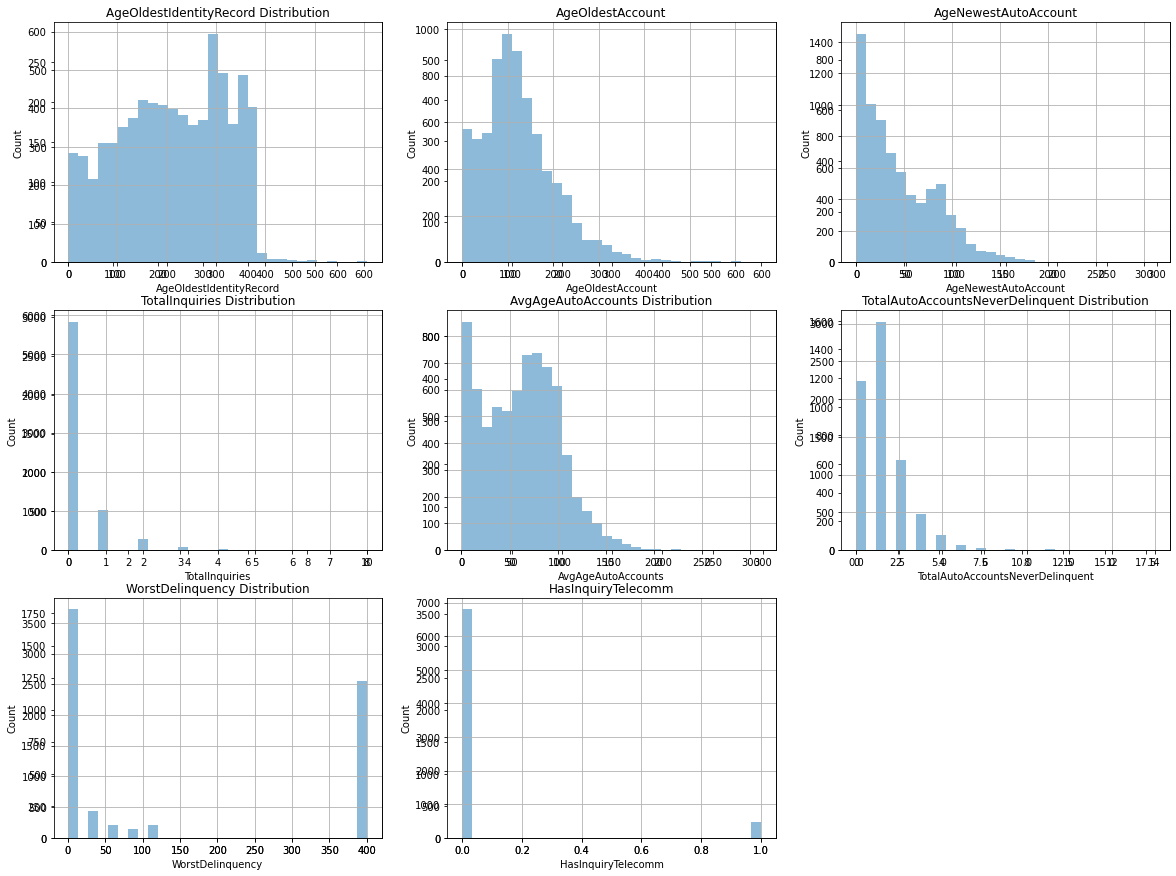

In [17]:


fig1 = plt.figure(figsize=(20,15))

#AgeOldestIdentityRecord
ax1= fig1.add_subplot(331)
ax1.set_xlabel('AgeOldestIdentityRecord')
ax1.set_ylabel('Count')
ax1.set_title('AgeOldestIdentityRecord Distribution')
positive_AgeOldestIdentityRecord.hist(alpha=0.5, bins=30)
ax2= fig1.add_subplot(331)
negative_AgeOldestIdentityRecord.hist(alpha=0.5, bins=30)

#AgeOldestAccount
ax3= fig1.add_subplot(332)
ax3.set_xlabel('AgeOldestAccount')
ax3.set_ylabel('Count')
ax3.set_title('AgeOldestAccount')
positive_AgeOldestAccount.hist(alpha=0.5, bins=30)
ax4= fig1.add_subplot(332)
negative_AgeOldestAccount.hist(alpha=0.5, bins=30)

#AgeNewestAutoAccount
ax5= fig1.add_subplot(333)
ax5.set_xlabel('AgeNewestAutoAccount')
ax5.set_ylabel('Count')
ax5.set_title('AgeNewestAutoAccount')
positive_AgeNewestAutoAccount.hist(alpha=0.5, bins=30)
ax6= fig1.add_subplot(333)
negative_AgeNewestAutoAccount.hist(alpha=0.5, bins=30)


#TotalInquiries
ax7= fig1.add_subplot(334)
ax7.set_xlabel('TotalInquiries')
ax7.set_ylabel('Count')
ax7.set_title('TotalInquiries Distribution')
positive_TotalInquiries.hist(alpha=0.5, bins=30)
ax8= fig1.add_subplot(334)
negative_TotalInquiries.hist(alpha=0.5, bins=30)

#AvgAgeAutoAccounts
ax9= fig1.add_subplot(335)
ax9.set_xlabel('AvgAgeAutoAccounts')
ax9.set_ylabel('Count')
ax9.set_title('AvgAgeAutoAccounts Distribution')
positive_AvgAgeAutoAccounts.hist(alpha=0.5, bins=30)
ax10= fig1.add_subplot(335)
negative_AvgAgeAutoAccounts.hist(alpha=0.5, bins=30)

#TotalAutoAccountsNeverDelinquent
ax11= fig1.add_subplot(336)
ax11.set_xlabel('TotalAutoAccountsNeverDelinquent')
ax11.set_ylabel('Count')
ax11.set_title('TotalAutoAccountsNeverDelinquent Distribution')
positive_TotalAutoAccountsNeverDelinquent.hist(alpha=0.5, bins=30)
ax12= fig1.add_subplot(336)
negative_TotalAutoAccountsNeverDelinquent.hist(alpha=0.5, bins=30)

#WorstDelinquency
ax13= fig1.add_subplot(337)
ax13.set_xlabel('WorstDelinquency')
ax13.set_ylabel('Count')
ax13.set_title('WorstDelinquency Distribution')
positive_WorstDelinquency.hist(alpha=0.5, bins=30)
ax14= fig1.add_subplot(337)
negative_WorstDelinquency.hist(alpha=0.5, bins=30)

#HasInquiryTelecomm
ax15= fig1.add_subplot(338)
ax15.set_xlabel('HasInquiryTelecomm')
ax15.set_ylabel('Count')
ax15.set_title('HasInquiryTelecomm')
positive_HasInquiryTelecomm.hist(alpha=0.5, bins=30)
ax16= fig1.add_subplot(338)
negative_HasInquiryTelecomm.hist(alpha=0.5, bins=30)



<AxesSubplot:>

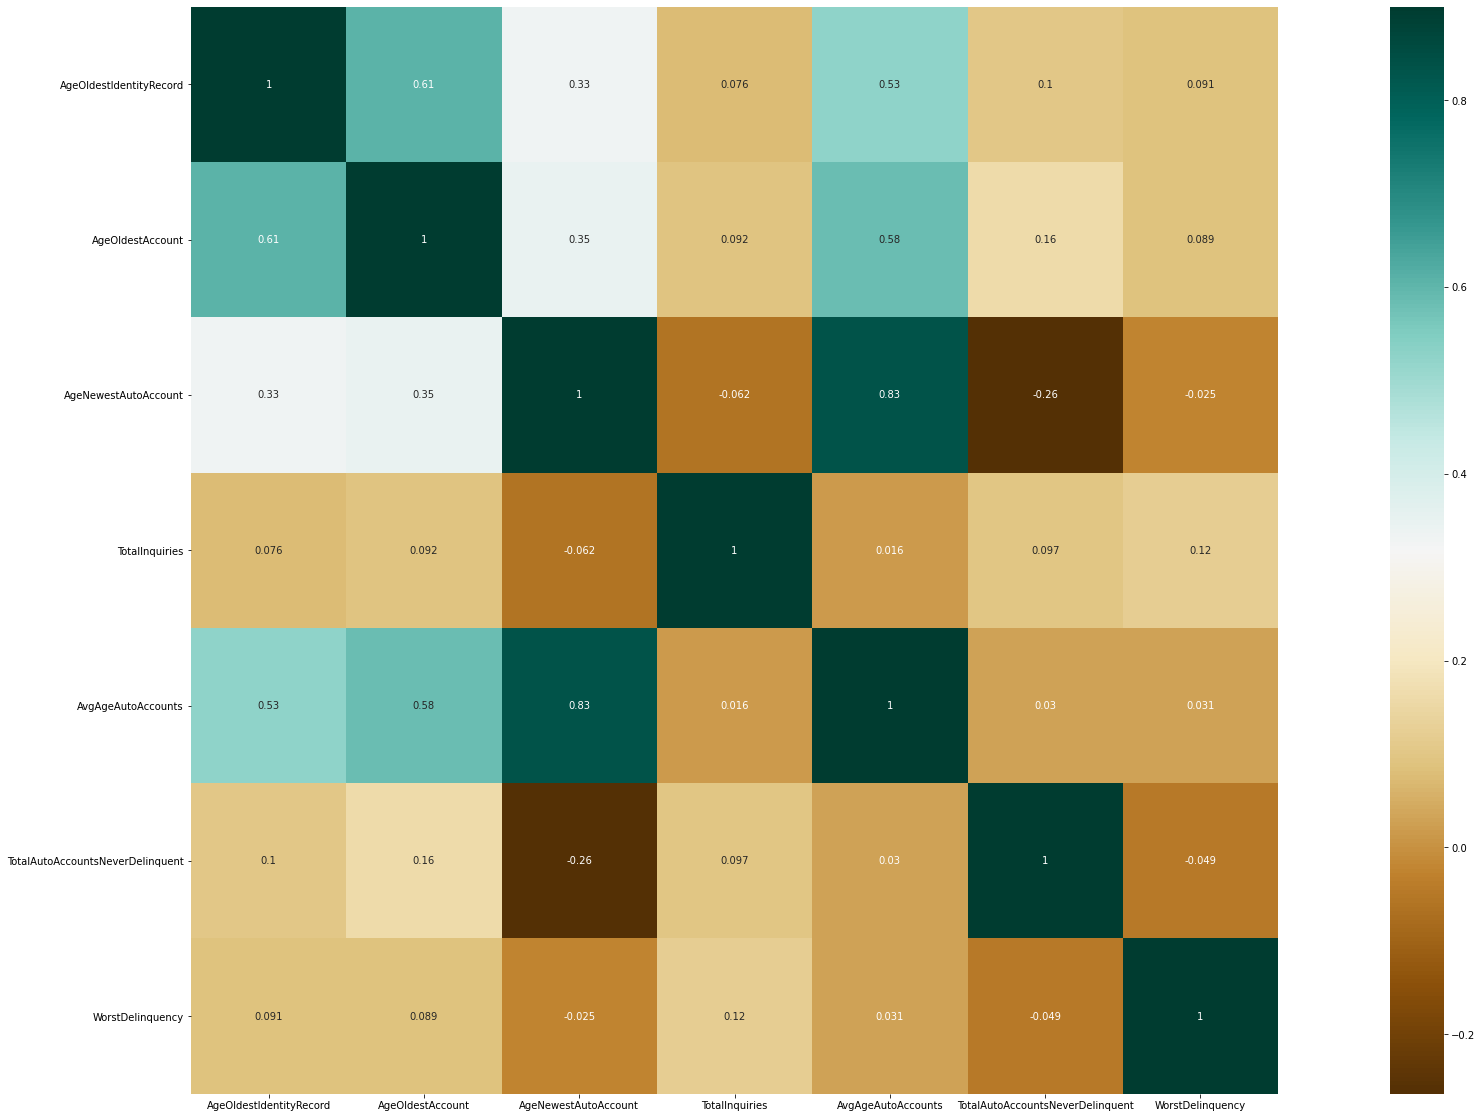

In [18]:
hmap=X_imp.corr()
plt.subplots(figsize=(40,20))
sns.heatmap(hmap,vmax=0.9,annot=True,cmap="BrBG",square=True)

#  Data Preprocessing

In [19]:
#Splitting data into train and test in 4:1 ratio stratified based on target variable 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42,stratify=y)

In [20]:
# MICE Imputation alrorithm trained on training set 

kernel = mf.KernelDataSet(
    X_train,
  save_all_iterations=True,
  random_state=1991)
kds.mice(10,n_jobs=-1)

In [21]:
# saved the trained Imputation algorithm

with open('impute_kernel_train','wb') as f:
    pickle.dump(kernel,f)

In [22]:
#loaded back the trained algorithm

with open('impute_kernel_train','rb') as f:
    kernel=pickle.load(f)

In [23]:
# Imputed train set 
X_train_imp = kernel.complete_data()

In [24]:
# Imputed test set
X_test_imp=kernel.impute_new_data(X_test).complete_data()

In [25]:
X_test_imp.isnull().sum().sum()

0

#  Random Forest

In [26]:
#Parameters defined for GRIDSEARCHCV

# parameters={'n_estimators':[170,200,220],'max_features':[3,5,8],'max_depth':[8,10,15]}
parameters={'n_estimators':[50,100,170],'max_features':[1,2,3],'max_depth':[3,5,8]}


In [27]:
#Algorithm used

rnd= RandomForestClassifier(random_state=0)

In [28]:
clf_grid=GridSearchCV(rnd,parameters,n_jobs=-1,scoring='accuracy').fit(X_train_imp,y_train)

In [29]:
#Found the best estimator
clf_grid.best_estimator_

RandomForestClassifier(max_depth=5, max_features=1, n_estimators=50,
                       random_state=0)

In [30]:
# Train accuracy score 
clf_grid.best_score_

0.6486666666666667

In [31]:
# Test accuracy score
clf_grid.score(X_test_imp,y_test)

0.648

In [32]:
#Confusion Matric 

print ("Confusion Matrix RF : \n", confusion_matrix(y_test, clf_grid.predict(X_test_imp)) )

Confusion Matrix RF : 
 [[1450    5]
 [ 787    8]]


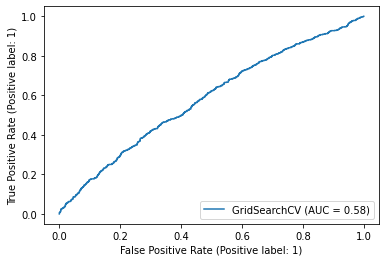

In [33]:
plot_roc_curve(clf_grid,X_test_imp,y_test)

C:\Users\nisha\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  from ipykernel import kernelapp as app


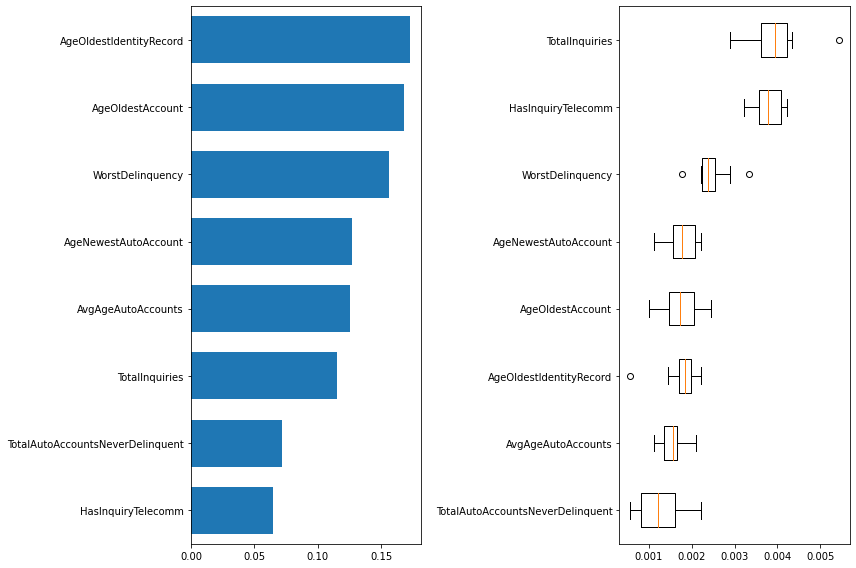

In [34]:
# Generation Random Forest feature Importance and Permutation Feature Importance Charts

import numpy as np
from sklearn.inspection import permutation_importance
result = permutation_importance(clf_grid, X_train_imp, y_train, n_repeats=10,
                                random_state=42)
perm_sorted_idx = result.importances_mean.argsort()

tree_importance_sorted_idx = np.argsort(clf_grid.best_estimator_.feature_importances_)
tree_indices = np.arange(0, len(clf_grid.best_estimator_.feature_importances_)) + 0.5

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 8))
ax1.barh(tree_indices,
         clf_grid.best_estimator_.feature_importances_[tree_importance_sorted_idx], height=0.7)
ax1.set_yticklabels(X_train_imp.columns[tree_importance_sorted_idx])
ax1.set_yticks(tree_indices)
ax1.set_ylim((0, len(clf_grid.best_estimator_.feature_importances_)))
ax2.boxplot(result.importances[perm_sorted_idx].T, vert=False,
            labels=X_train_imp.columns[perm_sorted_idx])
fig.tight_layout()
plt.show()

# LOGISTIC REGRESSION

In [35]:
data=pd.concat([X_train_imp,y_train],axis=1)

In [36]:
# Fitting model 

model=smf.logit(formula='''FirstYearDelinquency~AgeOldestIdentityRecord+AgeOldestAccount+AgeNewestAutoAccount
                                +TotalInquiries+ AvgAgeAutoAccounts+ TotalAutoAccountsNeverDelinquent +WorstDelinquency+ 
                                HasInquiryTelecomm''',data=data).fit()

Optimization terminated successfully.
         Current function value: 0.635529
         Iterations 5


In [37]:
# Regression Model Summary

print(model.summary())

                            Logit Regression Results                            
Dep. Variable:     FirstYearDelinquency   No. Observations:                 9000
Model:                            Logit   Df Residuals:                     8991
Method:                             MLE   Df Model:                            8
Date:                  Sun, 20 Jun 2021   Pseudo R-squ.:                 0.02169
Time:                          15:45:31   Log-Likelihood:                -5719.8
converged:                         True   LL-Null:                       -5846.6
Covariance Type:              nonrobust   LLR p-value:                 2.916e-50
                                       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercept                           -0.3000      0.070     -4.259      0.000      -0.438      -0.162
HasInquiryTelecomm[T.1.0]            0.3505      

In [38]:
# Training data prediction accuracy

print("Train Accuracy:",accuracy_score(y_train,list(map(round, model.predict(X_train_imp)))))

Train Accuracy: 0.6493333333333333


In [39]:
#Generating Probabilities and Prediction

yhat_log= model.predict(X_test_imp)
prediction=list(map(round, yhat_log))

print("Test Accuracy:",accuracy_score(y_test,prediction))

Test Accuracy: 0.6551111111111111


In [40]:
consolidated_output=pd.concat([X_test_imp,y_test,pd.DataFrame({"Probabilities":yhat_log,"Risk":prediction})],axis=1)

In [41]:
consolidated_output.groupby('Risk').describe().stack()

AgeOldestIdentityRecord  AgeOldestAccount  AgeNewestAutoAccount  \
Risk                                                                          
0    count              2145.000000       2145.000000           2145.000000   
     mean                208.077855        128.944056             48.681119   
     std                 107.706353         81.787708             35.795295   
     min                   1.000000          0.000000              1.000000   
     25%                 122.000000         76.000000             20.000000   
     50%                 214.000000        117.000000             40.000000   
     75%                 297.000000        167.000000             76.000000   
     max                 497.000000        547.000000            211.000000   
1    count               105.000000        105.000000            105.000000   
     mean                145.247619         94.847619             31.857143   
     std                  98.426445         61.104542             25.979810   
     min                   3.000000          6.000000              1.000000   
     25%                  65.000000         50.000000             12.000000   
     50%                 128.000000         84.000000             26.000000   
     75%                 218.000000        131.000000             43.000000   
     max                 367.000000        336.000000            123.000000   

            TotalInquiries  AvgAgeAutoAccounts  \
Risk                                             
0    count     2145.000000         2145.000000   
     mean         0.274126           70.174825   
     std          0.614962           33.953556   
     min          0.000000            1.000000   
     25%          0.000000           45.000000   
     50%          0.000000           70.000000   
     75%          0.000000           93.000000   
     max          5.000000          211.000000   
1    count      105.000000          105.000000   
     mean         1.923810           49.314286   
     std          1.696689           26.944142   
     min          0.000000            1.000000   
     25%          1.000000           29.000000   
     50%          2.000000           48.000000   
     75%          3.000000           65.000000   
     max          7.000000          134.000000   

            TotalAutoAccountsNeverDelinquent  WorstDelinquency  \
Risk                                                             
0    count                       2145.000000       2145.000000   
     mean                           1.184615        161.956177   
     std                            1.365365        188.468281   
     min                            0.000000          1.000000   
     25%                            0.000000          1.000000   
     50%                            1.000000         30.000000   
     75%                            2.000000        400.000000   
     max                           12.000000        400.000000   
1    count                        105.000000        105.000000   
     mean                           1.295238        372.704762   
     std                            1.775495         96.380448   
     min                            0.000000          1.000000   
     25%                            0.000000        400.000000   
     50%                            1.000000        400.000000   
     75%                            2.000000        400.000000   
     max                           12.000000        400.000000   

            FirstYearDelinquency  Probabilities  
Risk                                             
0    count           2145.000000    2145.000000  
     mean               0.341725       0.347409  
     std                0.474398       0.068655  
     min                0.000000       0.170712  
     25%                0.000000       0.294294  
     50%                0.000000       0.347046  
     75%                1.000000       0.397043  
     max                1.000000       0.498817  

In [42]:
# Confusion Matrix for Logistic Regression

cm = confusion_matrix(y_test, prediction) 
print ("Confusion Matrix Logistic : \n", cm) 

Confusion Matrix Logistic : 
 [[1412   43]
 [ 733   62]]


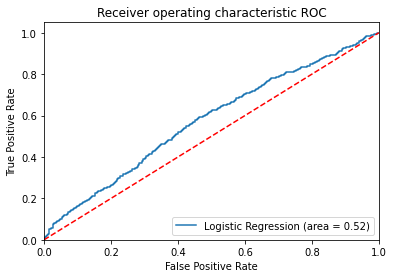

In [43]:
# ROC curve for Logictic Regression

logit_roc_auc = roc_auc_score(y_test, prediction)
fpr, tpr, thresholds = roc_curve(y_test, model.predict(X_test_imp))
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic ROC')
plt.legend(loc="lower right")

plt.show()

In [44]:
# Saved the logictic Regression Model 

with open("log_model","wb") as f:
    pickle.dump(model,f)

# # Removing multicollinearity and interpretations

In [45]:
X.isnull().sum()

AgeOldestIdentityRecord              132
AgeOldestAccount                    1340
AgeNewestAutoAccount                4964
TotalInquiries                       410
AvgAgeAutoAccounts                  4964
TotalAutoAccountsNeverDelinquent    4964
WorstDelinquency                    1317
HasInquiryTelecomm                    76
dtype: int64

In [46]:
# Generating Correlation plot
corrMatrix = X_imp.corr()
corrMatrix.style.background_gradient(cmap='coolwarm').set_precision(2)

,AgeOldestIdentityRecord,AgeOldestAccount,AgeNewestAutoAccount,TotalInquiries,AvgAgeAutoAccounts,TotalAutoAccountsNeverDelinquent,WorstDelinquency
AgeOldestIdentityRecord,1.00,0.61,0.33,0.08,0.53,0.10,0.09
AgeOldestAccount,0.61,1.00,0.35,0.09,0.58,0.16,0.09
AgeNewestAutoAccount,0.33,0.35,1.00,-0.06,0.83,-0.26,-0.03
TotalInquiries,0.08,0.09,-0.06,1.00,0.02,0.10,0.12
AvgAgeAutoAccounts,0.53,0.58,0.83,0.02,1.00,0.03,0.03
TotalAutoAccountsNeverDelinquent,0.10,0.16,-0.26,0.10,0.03,1.00,-0.05
WorstDelinquency,0.09,0.09,-0.03,0.12,0.03,-0.05,1.00


In [47]:
# Calculating Variance Inflation Factor

VIF=pd.DataFrame({'features':X_train_imp.columns})
VIF["vif"] = [variance_inflation_factor(X_train_imp.values, i) 
                          for i in range(len(X_train_imp.columns))] 
VIF

,features,vif
0,AgeOldestIdentityRecord,5.205413
1,AgeOldestAccount,4.657161
2,AgeNewestAutoAccount,3.552827
3,TotalInquiries,1.206420
4,AvgAgeAutoAccounts,5.742127
5,TotalAutoAccountsNeverDelinquent,1.676406
6,WorstDelinquency,1.682989
7,HasInquiryTelecomm,1.071474


In [48]:
# Dropped the AvgAgeAutoAccounts column to avoid Multicollinearity issue in interpretations

corrected_model=smf.logit(formula='''FirstYearDelinquency~AgeOldestIdentityRecord+AgeOldestAccount+AgeNewestAutoAccount
                                +TotalInquiries+ TotalAutoAccountsNeverDelinquent +WorstDelinquency+ 
                                HasInquiryTelecomm''',data=data).fit()

Optimization terminated successfully.
         Current function value: 0.635716
         Iterations 5


In [49]:
# Corrected Model Summary

print(corrected_model.summary())

                            Logit Regression Results                            
Dep. Variable:     FirstYearDelinquency   No. Observations:                 9000
Model:                            Logit   Df Residuals:                     8992
Method:                             MLE   Df Model:                            7
Date:                  Sun, 20 Jun 2021   Pseudo R-squ.:                 0.02140
Time:                          15:45:32   Log-Likelihood:                -5721.4
converged:                         True   LL-Null:                       -5846.6
Covariance Type:              nonrobust   LLR p-value:                 2.424e-50
                                       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercept                           -0.3511      0.065     -5.426      0.000      -0.478      -0.224
HasInquiryTelecomm[T.1.0]            0.3511      

# Normalizing and Predictor Importance

In [50]:
# Normalizing continuous variables using standard scalar

sc=StandardScaler()
data_norm_arr=sc.fit_transform(data.reset_index(drop=True).iloc[:,:7])

In [51]:
data_norm=pd.concat([pd.DataFrame(data_norm_arr,columns=data.columns[:7].tolist()),data.reset_index(drop=True).iloc[:,7:]],axis=1)

In [52]:
data_norm

,AgeOldestIdentityRecord,AgeOldestAccount,AgeNewestAutoAccount,TotalInquiries,AvgAgeAutoAccounts,TotalAutoAccountsNeverDelinquent,WorstDelinquency,HasInquiryTelecomm,FirstYearDelinquency
0,0.298229,0.010146,-0.448219,-0.430104,-0.749847,-0.131673,-0.883514,0.0,1
1,-1.680036,2.798936,-1.184720,-0.430104,0.196471,1.269933,-0.883514,0.0,0
2,0.270496,0.162957,-0.658648,-0.430104,3.006749,-0.832476,1.218454,0.0,1
3,0.936081,1.423642,-0.132576,2.198713,-0.692495,-0.832476,1.218454,0.0,1
4,-0.108517,-0.244538,-0.421916,-0.430104,0.339853,-0.131673,-0.883514,0.0,1
...,...,...,...,...,...,...,...,...,...
8995,1.259629,0.341236,-1.237327,0.884305,0.597939,1.269933,-0.414654,0.0,0
8996,-0.154738,0.761464,1.445640,-0.430104,1.286171,-0.131673,1.218454,0.0,0
8997,0.002414,-0.359145,0.998479,-0.430104,0.540587,-0.832476,-0.883514,0.0,0
8998,-0.912765,-0.320943,-0.711255,0.884305,-0.721171,-0.131673,1.218454,0.0,0


In [53]:
stand_model=smf.logit(formula='''FirstYearDelinquency~AgeOldestIdentityRecord+AgeOldestAccount+AgeNewestAutoAccount
                                +TotalInquiries+ TotalAutoAccountsNeverDelinquent +WorstDelinquency+ 
                                HasInquiryTelecomm''',data=data_norm).fit()

Optimization terminated successfully.
         Current function value: 0.635716
         Iterations 5


In [54]:
print(stand_model.summary())

                            Logit Regression Results                            
Dep. Variable:     FirstYearDelinquency   No. Observations:                 9000
Model:                            Logit   Df Residuals:                     8992
Method:                             MLE   Df Model:                            7
Date:                  Sun, 20 Jun 2021   Pseudo R-squ.:                 0.02140
Time:                          15:45:32   Log-Likelihood:                -5721.4
converged:                         True   LL-Null:                       -5846.6
Covariance Type:              nonrobust   LLR p-value:                 2.424e-50
                                       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercept                           -0.6475      0.023    -27.639      0.000      -0.693      -0.602
HasInquiryTelecomm[T.1.0]            0.3511      

# 3 Split up the dataset by the WorstDelinquency variable. Run a regression of FirstYearDelinquency ~ TotalInquiries. 

# Extract the predictor's coefficient and p-value from each model. Combine the results in a list where the names of the list correspond to the values of WorstDelinquency.


In [55]:
# Spliting dataset by WorstDelinquency variable and regression of FirstYearDelinquency ~ TotalInquiries

output={"WorstDelinquency":[],"pvalues":[],"coefficients":[]}

for i in data["WorstDelinquency"].unique().tolist():
    
    output["WorstDelinquency"].append(i)
    model_part=smf.logit(formula='''FirstYearDelinquency~TotalInquiries''',data=data[data["WorstDelinquency"]==i]).fit()
    output["pvalues"].append(model_part.pvalues["TotalInquiries"])  
    output["coefficients"].append(model_part.params["TotalInquiries"])

Optimization terminated successfully.
         Current function value: 0.616142
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.673476
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.644150
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.625468
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.632053
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.665560
         Iterations 4


In [62]:
# predictor's coefficient and p-value from each model

print(pd.DataFrame(output).sort_values(["WorstDelinquency"],ignore_index=True))

   WorstDelinquency   pvalues  coefficients
0               1.0  0.000045      0.225020
1              30.0  0.025120      0.229217
2              60.0  0.001744      0.439385
3              90.0  0.278157      0.151050
4             120.0  0.761430      0.044755
5             400.0  0.000035      0.164943


# 4 Prepare a scoring function to use your predictive model(s) in a production environment. To do this, you will need to accomplish the following:

-	Ingest new loans for scoring. You may assume that new records are received in batches in the same .csv format as the "account-defaults.csv" dataset.
-	Perform any required data preprocessing steps such as missing imputation.
-	Score the preprocessed input data using your model(s).
-	Output the scores so your business partners can match the scores to the new loans.


In [57]:
#created a random test sample 
accounts.drop(columns="FirstYearDelinquency").sample(frac=0.2,random_state=42).to_csv("new_data.csv",index = False)

In [58]:
#Removed ID column
new_data=pd.read_csv("new_data.csv")
new_data_1=new_data.drop(columns="ID")

In [59]:
#Imputed data using trained MICE algorithm

with open('impute_kernel_train','rb') as f:
    kernel=pickle.load(f)

new_data_imp=kernel.impute_new_data(new_data_1).complete_data()

In [60]:
#loaded trained logistic Regression model and genrated probabilities for new data 

with open("log_model","rb") as f:
    log_model=pickle.load(f)
    
prob=pd.DataFrame(log_model.predict(new_data_imp),columns=["Prob_del"])

In [63]:
# Mergred resultant probabilities with original data 
pd.concat([new_data,prob],axis=1).sort_values(["Prob_del"]).to_csv("output.csv",index=False)